<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Lecture_code/L9-Decision_tree.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; for interacting with the code


---
# Lecture notes - CART - Classification and regression trees
---

This is the lecture note for **decision tree**

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to decision tree. I encourage you to read further about decision trees. </p>

Read more:
- [DecisionTreeClassifier sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [DecisionTreeRegressor sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)
- [Decision trees sklearn theory](https://scikit-learn.org/stable/modules/tree.html)
- [Decision tree learning wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning)
- [Lecture slides chapter 8 - ISLR](https://hastie.su.domains/ISLR2/Slides/Ch8_Tree_Based_Methods.pdf)
- [ISLRv2 pp. 327-352](https://www.statlearning.com/)
---


In [27]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

plt.style.use("seaborn-white")

df = pd.read_csv("Data/Hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [29]:
df.dropna(inplace=True)

<AxesSubplot:xlabel='Years', ylabel='Hits'>

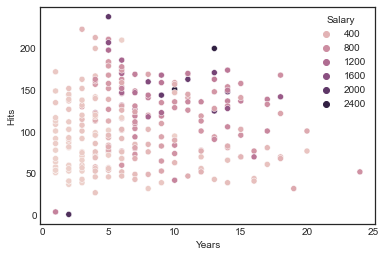

In [ ]:
sns.scatterplot(data = df, x = "Years", y="Hits", hue="Salary")
# Notera hue blir din 3e dimension

---
## Decision tree regression

The goal is to stratify or segment the players into several regions. In decision tree for regression, the algorithm creates a tree to minimize the RSS (residual sum of squares). The tree-building process uses recursive binary splitting, a top-down greedy approach to divide the predictor space into branches. For example the baseball dataset with years and hits we could have a split into the following regions: 

$R_1 = \{X|Years < 4.5\}, R_2 = \{X|Years \ge 4.5, Hits < 117.5\}, R_3 = \{X|Years \ge 4.5, Hits \ge 117.5\}$

For decision trees, you shouldn't scale the data.

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

model_tree_reg = DecisionTreeRegressor(max_depth=2)

X, y = df[["Years", "Hits"]], df["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((210, 2), (53, 2))

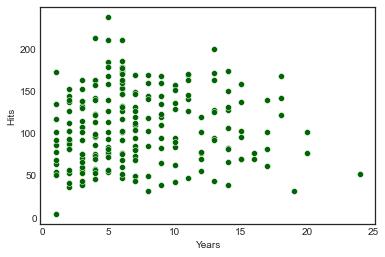

In [32]:
sns.scatterplot(data=X_train, x="Years", y="Hits", color="darkgreen");

<AxesSubplot:>

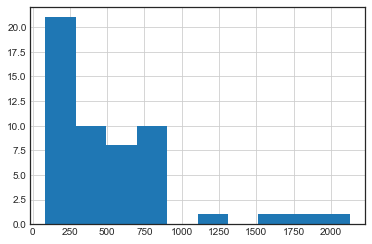

In [33]:
y_test.hist()

In [34]:
model_tree_reg.fit(X_train, y_train)
model_tree_reg.feature_importances_

array([0.58742156, 0.41257844])

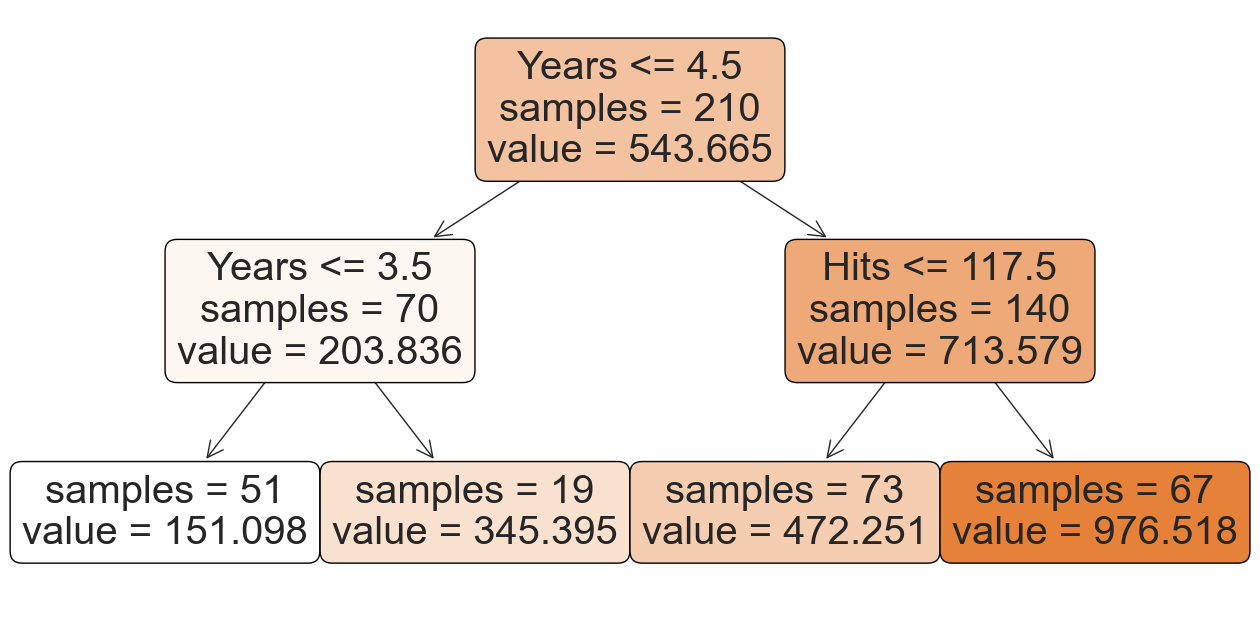

In [35]:
from sklearn import tree

fig, ax = plt.figure(figsize=(16,8), dpi=100), plt.axes()
tree.plot_tree(model_tree_reg, filled=True, ax=ax, feature_names=list(X.columns), impurity=False, rounded=True);

In [36]:
# TODO: make an exercise for students to extract decision thresholds and draw decision boundary
print(tree.export_text(model_tree_reg, feature_names = list(X_train.columns)))

|--- Years <= 4.50
|   |--- Years <= 3.50
|   |   |--- value: [151.10]
|   |--- Years >  3.50
|   |   |--- value: [345.39]
|--- Years >  4.50
|   |--- Hits <= 117.50
|   |   |--- value: [472.25]
|   |--- Hits >  117.50
|   |   |--- value: [976.52]



In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model_tree_reg.predict(X_test)

mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

(235.0067581537342, 379.69119483603174)

---
## Decision tree classification

As in the regression case, the tree is grown through recursive binary splitting that minimizes a loss function locally. However RSS can't be used as loss function in classification. Instead Gini impurity or cross-entropy can be used. 

Gini impurity measures a nodes purity, with a small value showing that most of the observations come from one class:
$$G = \sum_{k=1}^K \hat{p}_{mk}(1-\hat{p}_{mk})$$

where $\hat{p}_{mk}$ is the proportion of training observations in region $m$ from class $k$. So when $\hat{p}_{mk}$ is near 0 or 1, which means most of that region is from one class, the Gini impurity becomes small.

Cross-entropy is numerically similar to the Gini impurity, as it will be near 0 when $\hat{p}_{mk}$ is near 0 or 1:
$$D = -\sum_{k=1}^K \hat{p}_{mk}\log{\hat{p}_{mk}}$$

In [38]:
df = pd.read_csv("Data/Default.csv")
df = pd.get_dummies(df, drop_first=True)
df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [39]:
X, y = df.drop("default_Yes", axis=1), df["default_Yes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((8000, 3), (2000, 3))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1931
           1       0.35      0.32      0.33        69

    accuracy                           0.96      2000
   macro avg       0.66      0.65      0.66      2000
weighted avg       0.95      0.96      0.96      2000



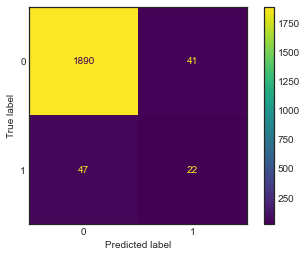

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot();

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---


### Repetition

(235.0067581537342, 379.69119483603174)

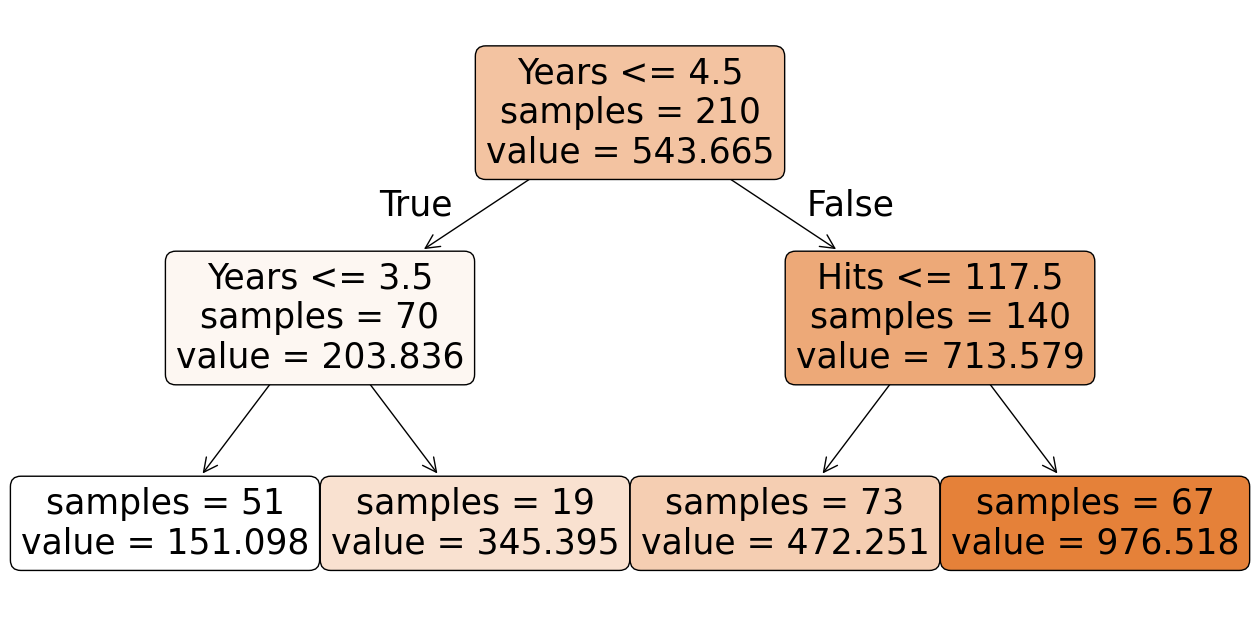

In [6]:
# 1) Load the data
import pandas as pd 
df = pd.read_csv("../Data/Hitters.csv")

# 2) EDA & Data cleaning
import matplotlib.pyplot as plt 
import seaborn as sns 
## df.info()
df.dropna(inplace=True)
# Remeber hue aka color is technically a dimension
## sns.scatterplot(data = df, x = "Years", y="Hits", hue="Salary")

# 3) Split the Data
from sklearn.model_selection import train_test_split
X, y = df[["Years", "Hits"]], df["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

# 4) Create and Train the model 
#    Note that this time were trying to predict a 
#    regression, and Decision Trees are not very 
#    good at it as we will see, there much better
#    at classifications.
from sklearn.tree import DecisionTreeRegressor
model_tree_reg = DecisionTreeRegressor(max_depth=2)
model_tree_reg.fit(X_train, y_train)

# 5) Sheck the ratio of the first split(?)
model_tree_reg.feature_importances_

# 6) Plot the tree
from sklearn import tree
fig, ax = plt.figure(figsize=(16,8), dpi=100), plt.axes()
tree.plot_tree(model_tree_reg, filled=True, ax=ax, feature_names=list(X.columns), impurity=False, rounded=True);

# 7) error check
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = model_tree_reg.predict(X_test)
mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98      1931
        True       0.33      0.30      0.32        69

    accuracy                           0.95      2000
   macro avg       0.65      0.64      0.65      2000
weighted avg       0.95      0.95      0.95      2000



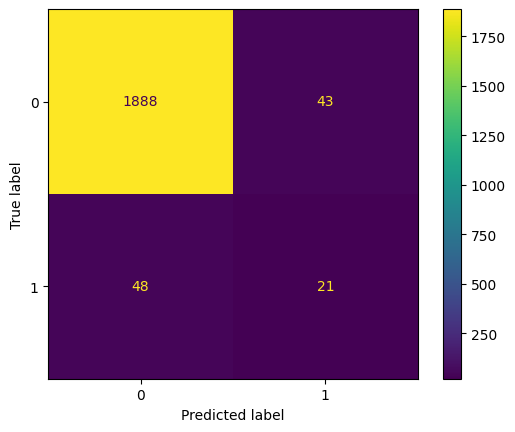

In [10]:
# Decision Trees : Classification

# 1) Load the data
df = pd.read_csv("../Data/Default.csv")
df = pd.get_dummies(df, drop_first=True)

# 2) Split the data
X, y = df.drop("default_Yes", axis=1), df["default_Yes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

# 3) Ceate and train and use model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 4) Test the model with confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot();

